In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("/content/American_Housing_Data_20231209.csv")

In [6]:
df.head(5)

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601


In [7]:
df.describe()

,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
count,39981.000000,3.998100e+04,39981.000000,39981.000000,39981.000000,39981.000000,39981.000000,39979.000000,39981.000000,39981.000000
mean,64833.391336,6.227771e+05,3.171682,2.466572,1901.522723,37726.201996,2379.412483,110837.259861,36.435668,-98.080576
std,25614.601116,9.469793e+05,1.308796,1.323042,1211.307257,18672.647445,2946.574792,47309.055715,4.446862,15.061145
min,10013.000000,1.800000e+03,1.000000,1.000000,2.000000,0.000000,0.000000,27475.000000,25.729830,-122.826870
25%,40215.000000,2.650000e+05,3.000000,2.000000,1200.000000,24465.000000,902.400000,76640.000000,33.239850,-111.636310
50%,74136.000000,3.999000e+05,3.000000,2.000000,1639.000000,35049.000000,1588.700000,100405.000000,36.166620,-96.839680
75%,85730.000000,6.749900e+05,4.000000,3.000000,2265.000000,46816.000000,2736.800000,135075.000000,39.283090,-85.656980
max,98199.000000,3.800000e+07,54.000000,66.000000,74340.000000,116469.000000,58289.600000,900203.000000,47.742370,-73.704510


In [8]:
df.info()

# No null objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39981 entries, 0 to 39980
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 39981 non-null  int64  
 1   Price                    39981 non-null  float64
 2   Beds                     39981 non-null  int64  
 3   Baths                    39981 non-null  int64  
 4   Living Space             39981 non-null  int64  
 5   Address                  39981 non-null  object 
 6   City                     39981 non-null  object 
 7   State                    39981 non-null  object 
 8   Zip Code Population      39981 non-null  int64  
 9   Zip Code Density         39981 non-null  float64
 10  County                   39981 non-null  object 
 11  Median Household Income  39979 non-null  float64
 12  Latitude                 39981 non-null  float64
 13  Longitude                39981 non-null  float64
dtypes: float64(5), int64(5

In [9]:
import seaborn as sns

sns.set(style='whitegrid')


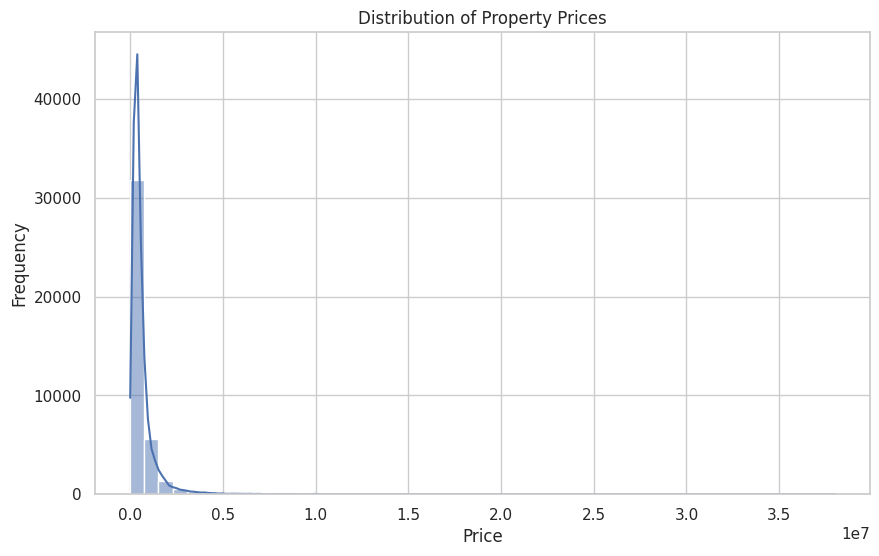

In [11]:
# Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


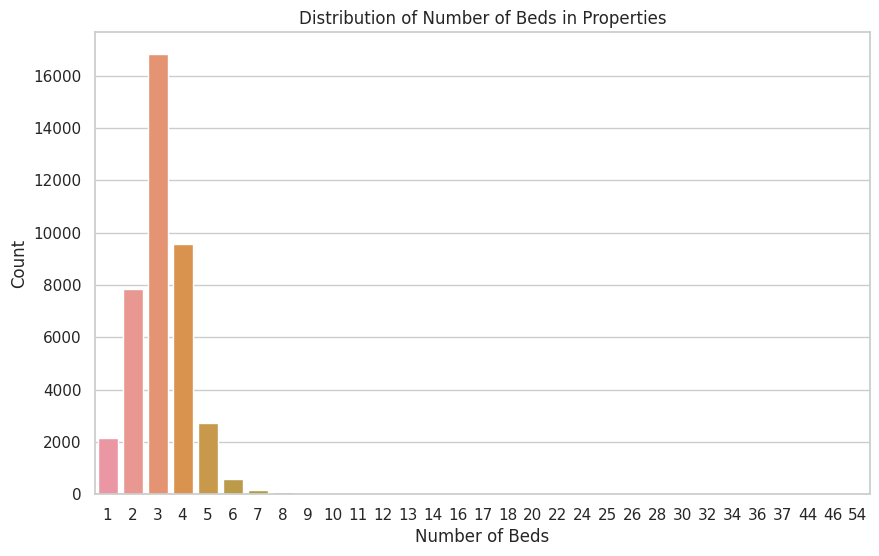

In [13]:

# Beds Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Beds', data=df)
plt.title('Distribution of Number of Beds in Properties')
plt.xlabel('Number of Beds')
plt.ylabel('Count')
plt.show()


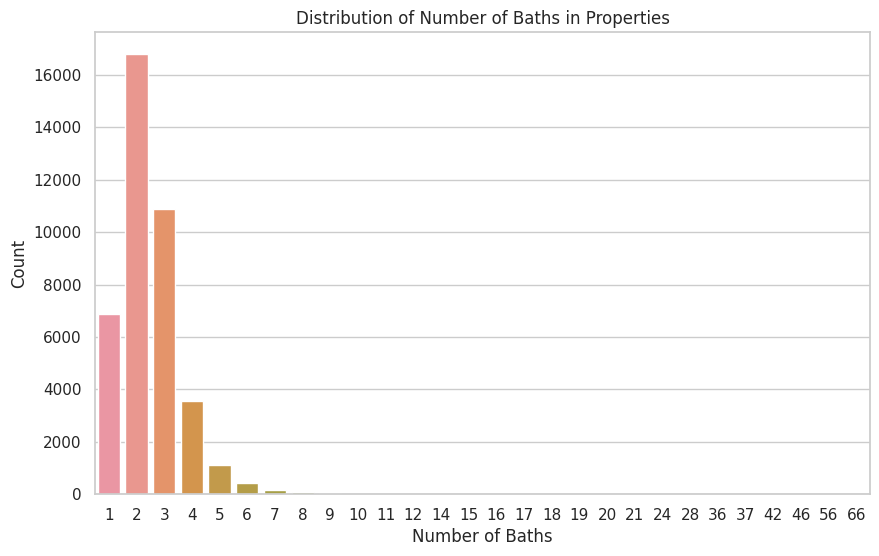

In [15]:

# Baths Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Baths', data=df)
plt.title('Distribution of Number of Baths in Properties')
plt.xlabel('Number of Baths')
plt.ylabel('Count')
plt.show()



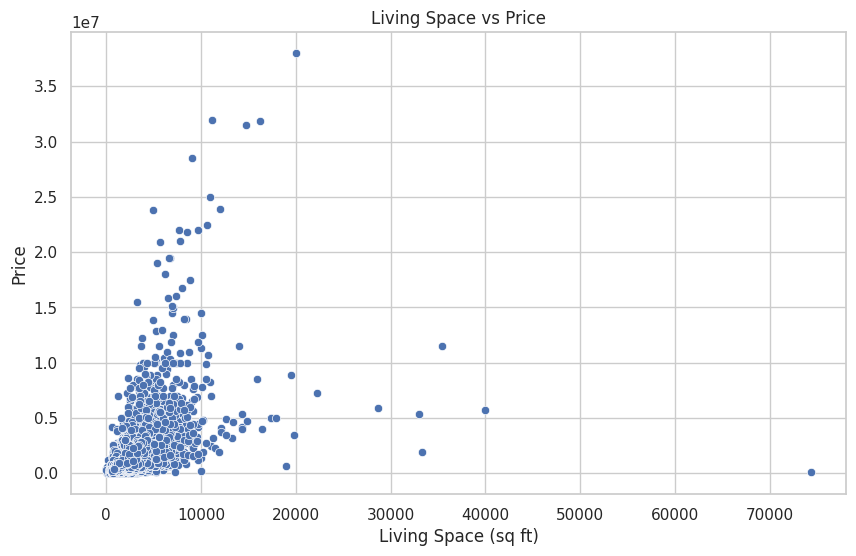

In [16]:
# Living Space vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Living Space', y='Price', data=df)
plt.title('Living Space vs Price')
plt.xlabel('Living Space (sq ft)')
plt.ylabel('Price')
plt.show()

In [22]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
        otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return x.replace('$', '').replace(',', '')
    return x

df['Price'] = df['Price'].apply(clean_currency).astype(float)

# Convert categorical columns to numerical using get_dummies
string_columns = df.select_dtypes(include=['object']).columns

# We exclude 'Address' from dummies since it's unique for each property
string_columns = string_columns.drop('Address')
df = pd.get_dummies(df, columns=string_columns, drop_first=True)

# Display the head of the cleaned dataframe

In [23]:
df.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,Zip Code Population,Zip Code Density,Median Household Income,Latitude,...,County_Travis,County_Tulsa,County_Union,County_Virginia Beach,County_Wagoner,County_Wake,County_Washington,County_Wayne,County_Williamson,County_Wyandotte
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,29563,20967.9,370046.0,40.72001,...,0,0,0,0,0,0,0,0,0,0
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,29563,20967.9,370046.0,40.72001,...,0,0,0,0,0,0,0,0,0,0
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,29815,23740.9,249880.0,40.73407,...,0,0,0,0,0,0,0,0,0,0
3,10014,760000.0,3,2,1538,38 JONES ST,29815,23740.9,249880.0,40.73407,...,0,0,0,0,0,0,0,0,0,0
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,29815,23740.9,249880.0,40.73407,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df.columns

Index(['Zip Code', 'Price', 'Beds', 'Baths', 'Living Space', 'Address',
       'Zip Code Population', 'Zip Code Density', 'Median Household Income',
       'Latitude',
       ...
       'County_Travis', 'County_Tulsa', 'County_Union',
       'County_Virginia Beach', 'County_Wagoner', 'County_Wake',
       'County_Washington', 'County_Wayne', 'County_Williamson',
       'County_Wyandotte'],
      dtype='object', length=371)

In [45]:
df = df.drop("Address", axis = 1)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30292 entries, 19 to 39946
Columns: 370 entries, Zip Code to County_Wyandotte
dtypes: float64(5), int64(5), uint8(360)
memory usage: 13.9 MB


In [47]:
# List of numerical columns to check for correlation with Price
numerical_columns = ['Beds', 'Baths', 'Living Space', 'Zip Code Population', 'Zip Code Density', 'Median Household Income', 'Latitude', 'Longitude']

# Remove outliers using IQR
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

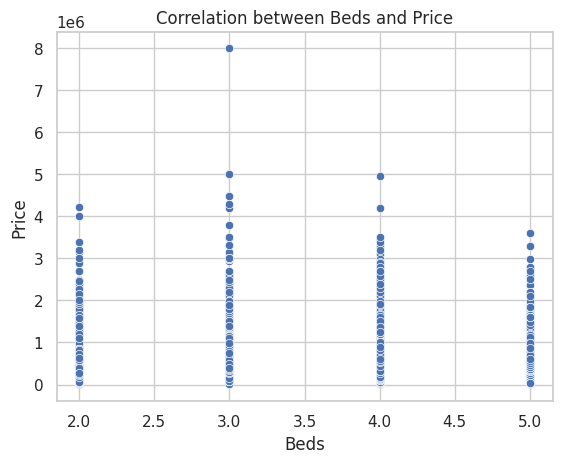

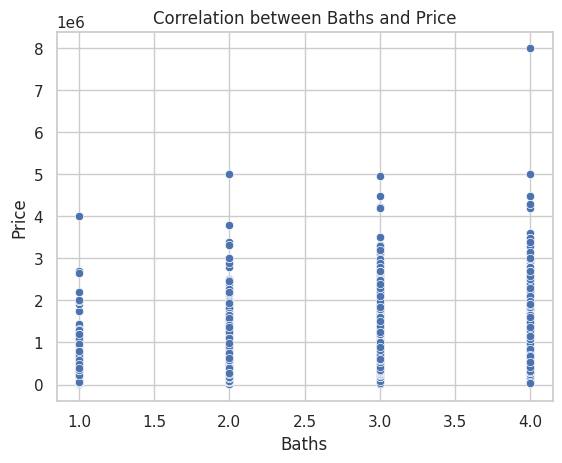

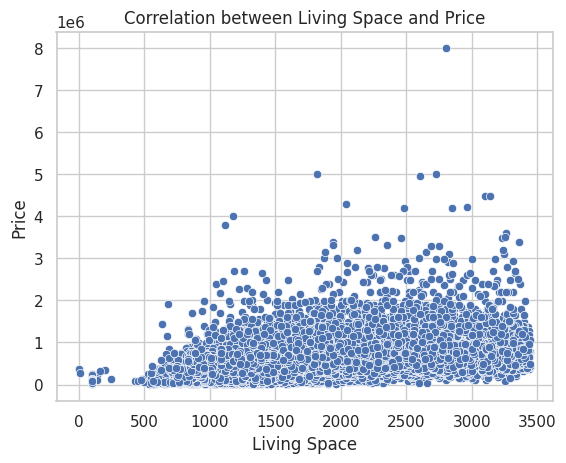

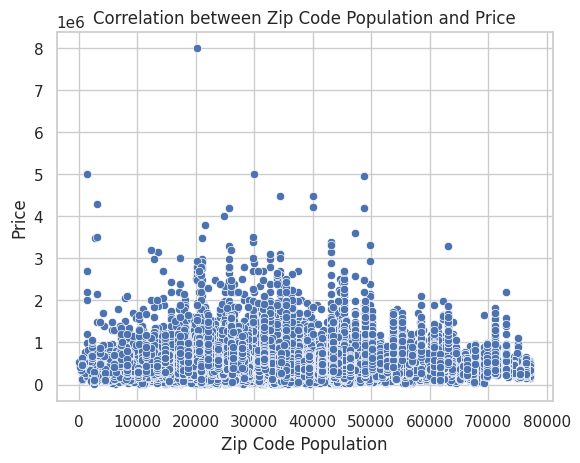

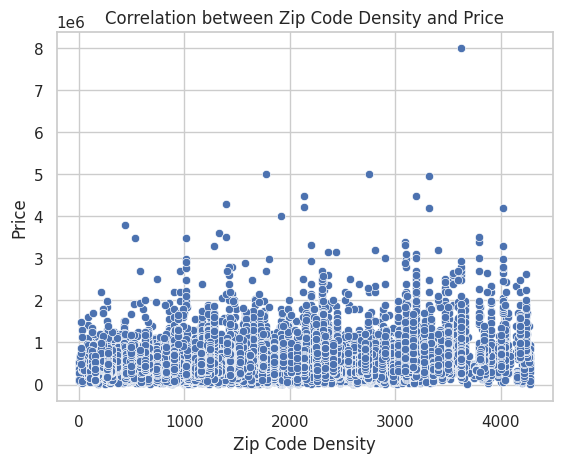

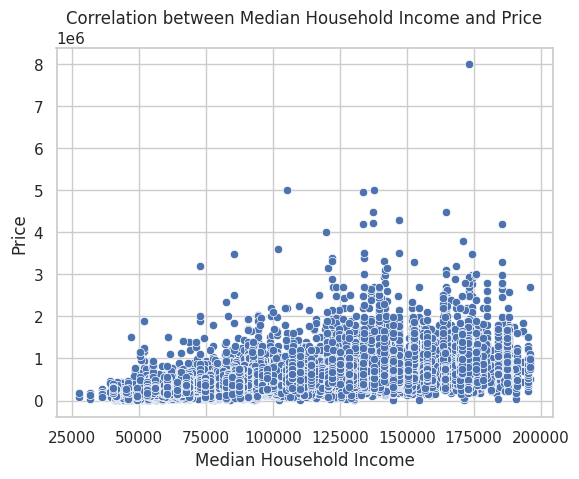

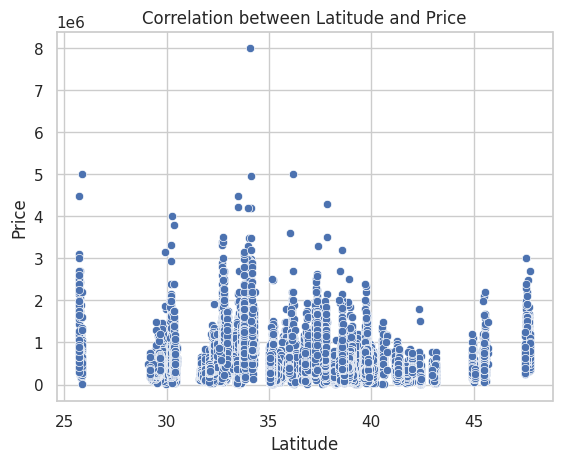

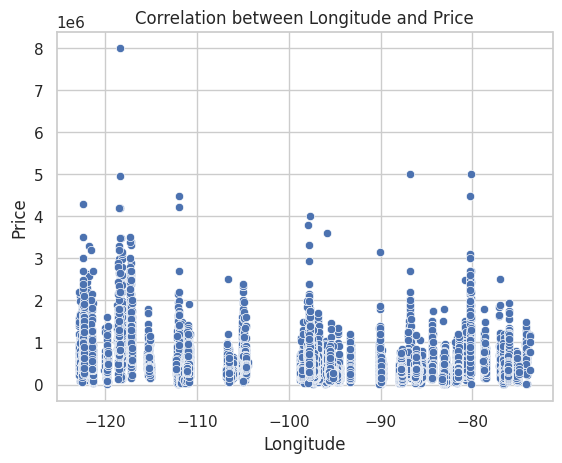

In [48]:
# After removing outliers, let's plot the correlation of remaining data with Price
for column in numerical_columns:
    sns.scatterplot(data=df, x=column, y='Price')
    plt.title('Correlation between ' + column + ' and Price')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()

In [49]:
df.head()

,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude,...,County_Travis,County_Tulsa,County_Union,County_Virginia Beach,County_Wagoner,County_Wake,County_Washington,County_Wayne,County_Williamson,County_Wyandotte
19,10301,750000.0,4,2,1853,38736,3980.1,118113.0,40.62803,-74.09564,...,0,0,0,0,0,0,0,0,0,0
21,10301,1148888.0,4,3,1980,38736,3980.1,118113.0,40.62803,-74.09564,...,0,0,0,0,0,0,0,0,0,0
22,10301,998000.0,3,1,2288,38736,3980.1,118113.0,40.62803,-74.09564,...,0,0,0,0,0,0,0,0,0,0
23,10301,849000.0,4,2,2511,38736,3980.1,118113.0,40.62803,-74.09564,...,0,0,0,0,0,0,0,0,0,0
24,10301,575000.0,2,1,1200,38736,3980.1,118113.0,40.62803,-74.09564,...,0,0,0,0,0,0,0,0,0,0


Price                      1.000000
Median Household Income    0.526175
Living Space               0.407512
State_California           0.390093
Baths                      0.374845
Name: Price, dtype: float64


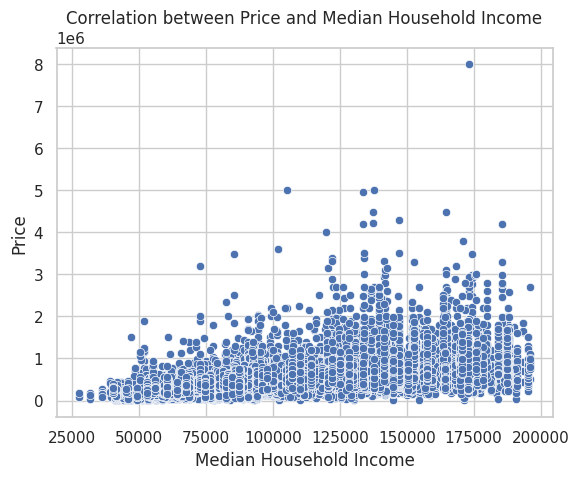

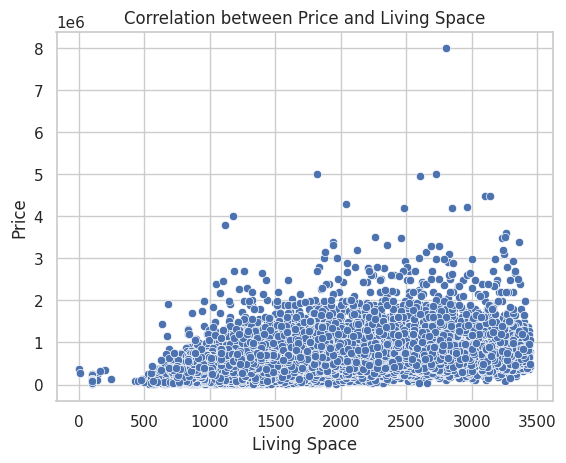

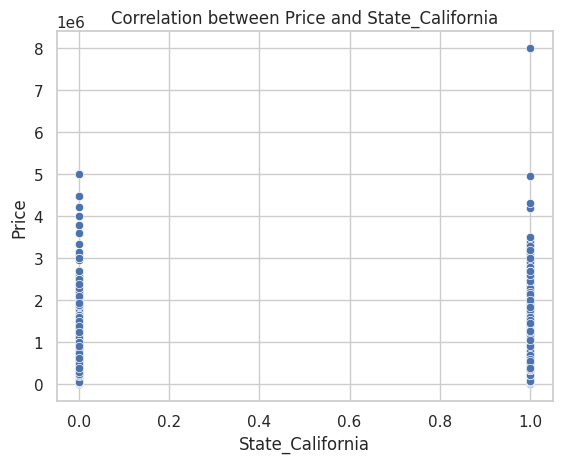

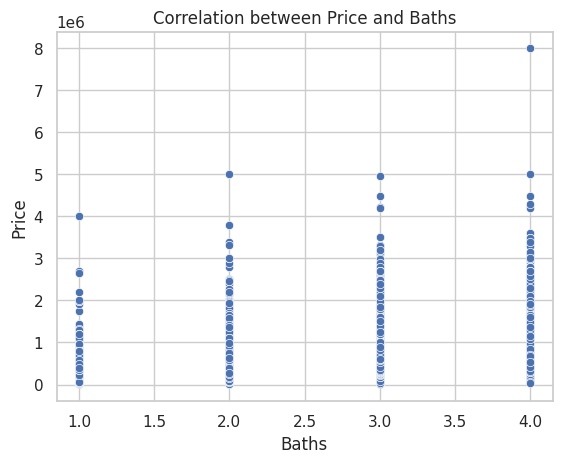

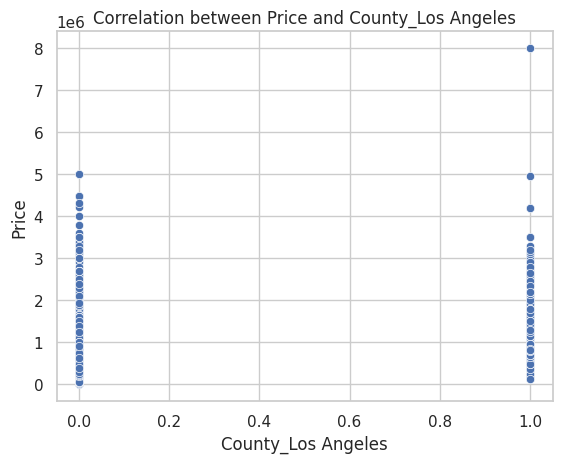

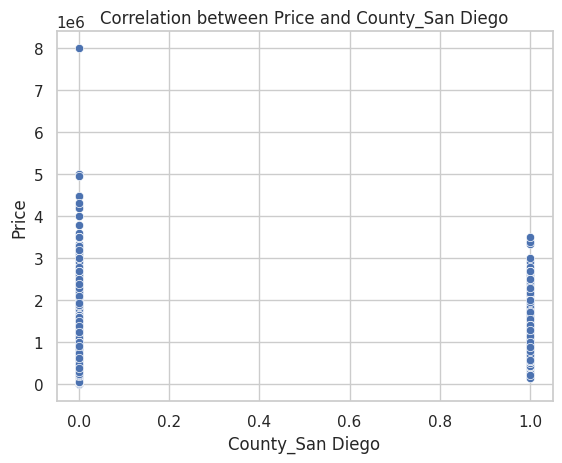

In [51]:
correlation_matrix = df.corr()

# Find the columns with the highest correlation with 'Price'
price_correlation = correlation_matrix['Price'].sort_values(ascending=False)

# Display the columns with the highest correlation with 'Price'
print(price_correlation.head())

# Visualize the relationship between 'Price' and other highly correlated variables
# Select the top 3 correlated variables (excluding 'Price' itself)
top_correlated_columns = price_correlation.index[1:7]

# Plotting
for column in top_correlated_columns:
    sns.scatterplot(data=df, x=column, y='Price')
    plt.title('Correlation between Price and ' + column)
    plt.show()

In [52]:
df.to_csv('cleaned_housing_data.csv', index=False)